In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Копируем репозитрий с yolov5

In [ ]:
%cd /content/drive/MyDrive/digital_gap_2021
!git clone https://github.com/ultralytics/yolov5 # стандартный репозиторий

/content/drive/MyDrive/digital_gap_2021
Cloning into 'yolov5'...
remote: Enumerating objects: 10245, done.
remote: Total 10245 (delta 0), reused 0 (delta 0), pack-reused 10245
Receiving objects: 100% (10245/10245), 10.45 MiB | 6.13 MiB/s, done.
Resolving deltas: 100% (7108/7108), done.


# Устанавливаем необходимые зависимости

In [ ]:
%cd /content/drive/MyDrive/digital_gap_2021/yolov5
%pip install -r requirements.txt

/content/drive/MyDrive/digital_gap_2021/yolov5
     |████████████████████████████████| 596 kB 5.4 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
!pip install pycocotools

# Импорт библиотек

In [ ]:
import cv2
import matplotlib.pyplot as plt
from IPython.display import Image

import glob
import os
import shutil

from tqdm.notebook import tqdm


# Посмотрим на датасет


In [ ]:
def plot_ann_img(img_path, ann_path):
  
  img = cv2.imread(img_path)
  dh, dw, _ = img.shape

  fl = open(ann_path, 'r')
  data = fl.readlines()
  fl.close()

  for dt in data:
      # Split string to float
      m, x, y, w, h = map(float, dt.split(' '))

      l = int((x - w / 2) * dw)
      r = int((x + w / 2) * dw)
      t = int((y - h / 2) * dh)
      b = int((y + h / 2) * dh)
      
      if l < 0:
          l = 0
      if r > dw - 1:
          r = dw - 1
      if t < 0:
          t = 0
      if b > dh - 1:
          b = dh - 1

      cv2.rectangle(img, (l, t), (r, b), (0, 0, 255), 1)
      cv2.putText(img, str(round(m)), (l, t-10),  cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 1)

  fig,ax = plt.subplots(figsize=(20,8))    
  ax.axis('off')
  ax.imshow(img)
  plt.show()

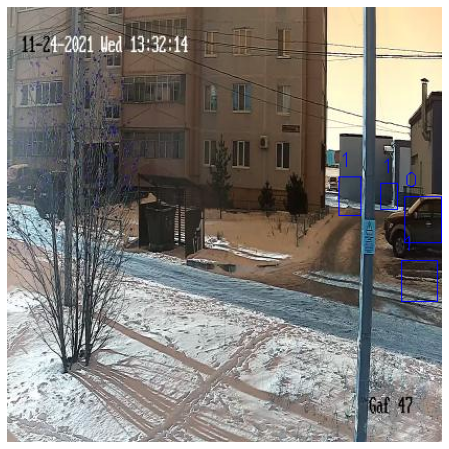

In [ ]:
plot_ann_img('/content/drive/MyDrive/digital_gap_2021/valid/images/24-11-2021_10-32-17_AM_png.rf.d6cefabc3e535cdbe4e08be3713396ed.jpg',
             '/content/drive/MyDrive/digital_gap_2021/valid/labels/24-11-2021_10-32-17_AM_png.rf.d6cefabc3e535cdbe4e08be3713396ed.txt')  

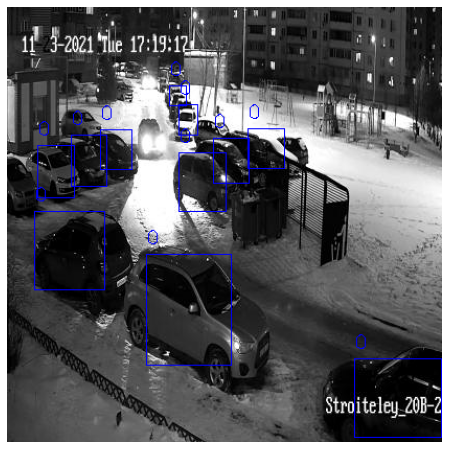

In [ ]:
plot_ann_img('/content/drive/MyDrive/digital_gap_2021/valid/images/23-11-2021_02-19-19_PM_png.rf.4f2df4e82d4440733f69437be1941af0.jpg',
             '/content/drive/MyDrive/digital_gap_2021/valid/labels/23-11-2021_02-19-19_PM_png.rf.4f2df4e82d4440733f69437be1941af0.txt') 

# Тренируем сеть

In [ ]:
%ls

CONTRIBUTING.md  Dockerfile  LICENSE    requirements.txt  tutorial.ipynb
data/            export.py   models/    setup.cfg         utils/
detect.py        hubconf.py  README.md  train.py          val.py


In [ ]:
%%time
!python train.py --img 320 --batch 4 --epochs 100 --data /content/drive/MyDrive/digital_gap_2021/data.yaml --cfg /content/drive/MyDrive/digital_gap_2021/yolov5/models/yolov5s.yaml --weights yolov5s.pt # Нужно правильно прописать для тренировки на нашем датасете

train: weights=yolov5s.pt, cfg=/content/drive/MyDrive/digital_gap_2021/yolov5/models/yolov5s.yaml, data=/content/drive/MyDrive/digital_gap_2021/data.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=100, batch_size=4, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 2021-12-3 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4

# Сохраняем лучшие веса

In [ ]:
!cp /content/drive/MyDrive/digital_gap_2021/yolov5/runs/train/exp/weights/best.pt /content/drive/MyDrive/digital_gap_2021/best_100_epoch_gpu.pt

# Детектируем

In [ ]:
#%cd /content/drive/MyDrive/digital_gap_final_trash_yolov5/trash-20211202T130403Z-001/yolov5
!python detect.py --weights runs/train/exp/weights/best.pt --img 320 --conf 0.4 --save-txt --source /content/drive/MyDrive/digital_gap_2021/test/images/23-11-2021_06-11-27_PM_png.rf.520a23306b1709cd34b1256959fc32b8.jpg

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/drive/MyDrive/digital_gap_2021/test/images/23-11-2021_06-11-27_PM_png.rf.520a23306b1709cd34b1256959fc32b8.jpg, imgsz=[320, 320], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-122-gd885799 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/drive/MyDrive/digital_gap_2021/test/images/23-11-2021_06-11-27_PM_png.rf.520a23306b1709cd34b1256959fc32b8.jpg: 320x320 2 busys, 1 empty, Done. (0.024s)
Speed: 0.5ms pre-process, 23.9ms inference, 2.6ms NMS per image at shape (1, 3, 320, 320)
Results saved to runs/detect/exp
1 labe

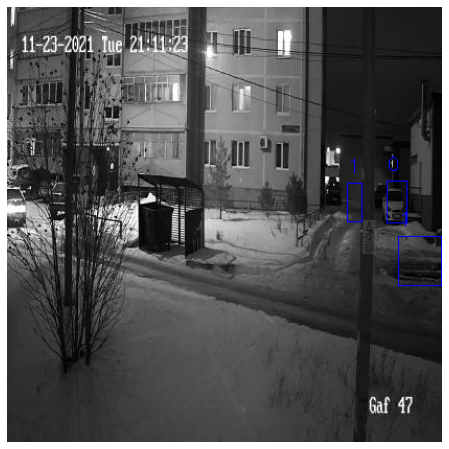

In [ ]:
plot_ann_img('/content/drive/MyDrive/digital_gap_2021/test/images/23-11-2021_06-11-27_PM_png.rf.520a23306b1709cd34b1256959fc32b8.jpg',
             '/content/drive/MyDrive/digital_gap_2021/test/labels/23-11-2021_06-11-27_PM_png.rf.520a23306b1709cd34b1256959fc32b8.txt')

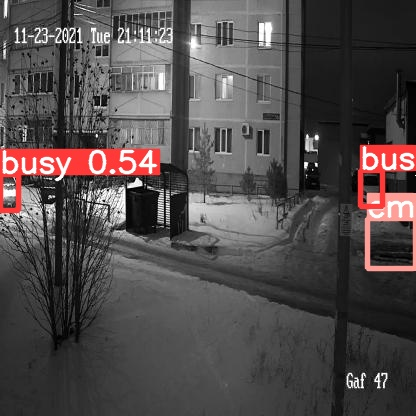

In [ ]:
Image('runs/detect/exp/23-11-2021_06-11-27_PM_png.rf.520a23306b1709cd34b1256959fc32b8.jpg',)